# Task
Calculate the age of each marathon runner from the 'birthdate' and 'year' columns in the file "/content/marathon.csv" and plot the age distribution over the years.

## Load the data

### Subtask:
Load the data from "/content/marathon.csv" into a pandas DataFrame.


**Reasoning**:
Import the pandas library, load the data from the CSV file into a DataFrame, and display the first few rows.



In [1]:
import pandas as pd

df = pd.read_csv("/content/marathon.csv")
display(df.head())

,Rank,Time,Name,Country,Date of Birth,Place,City,Date,Gender,Event
0,1,2:00:35,Kelvin Kiptum,KEN,02.12.1999,1,Chicago,08.10.2023,Men,Marathon
1,1,2:09:56,Ruth Chepngetich,KEN,08.08.1994,1,Chicago,13.10.2024,Women,Marathon
2,2,2:11:53,Tigst Assefa,ETH,03.12.1996,1,Berlin,24.09.2023,Women,Marathon
3,2,2:01:09,Eliud Kipchoge,KEN,05.11.1984,1,Berlin,25.09.2022,Men,Marathon
4,3,2:13:44,Sifan Hassan,NED,01.01.1993,1,Chicago,08.10.2023,Women,Marathon


## Calculate age

### Subtask:
Calculate the age of each runner based on the 'birthdate' and 'year' columns.


**Reasoning**:
Convert date columns to datetime objects, extract the year from the 'Date' column, and calculate the age.



In [2]:
df['Date of Birth'] = pd.to_datetime(df['Date of Birth'], format='%d.%m.%Y', errors='coerce')
df['Date'] = pd.to_datetime(df['Date'], format='%d.%m.%Y', errors='coerce')
df['year'] = df['Date'].dt.year
df['Age'] = df['year'] - df['Date of Birth'].dt.year
display(df[['Name', 'Date of Birth', 'Date', 'year', 'Age']].head())

,Name,Date of Birth,Date,year,Age
0,Kelvin Kiptum,1999-12-02,2023-10-08,2023,24.0
1,Ruth Chepngetich,1994-08-08,2024-10-13,2024,30.0
2,Tigst Assefa,1996-12-03,2023-09-24,2023,27.0
3,Eliud Kipchoge,1984-11-05,2022-09-25,2022,38.0
4,Sifan Hassan,1993-01-01,2023-10-08,2023,30.0


## Visualize age distribution

### Subtask:
Create a plot showing the distribution of runner ages over the years.


**Reasoning**:
Create a scatter plot to visualize the distribution of runner ages over the years.



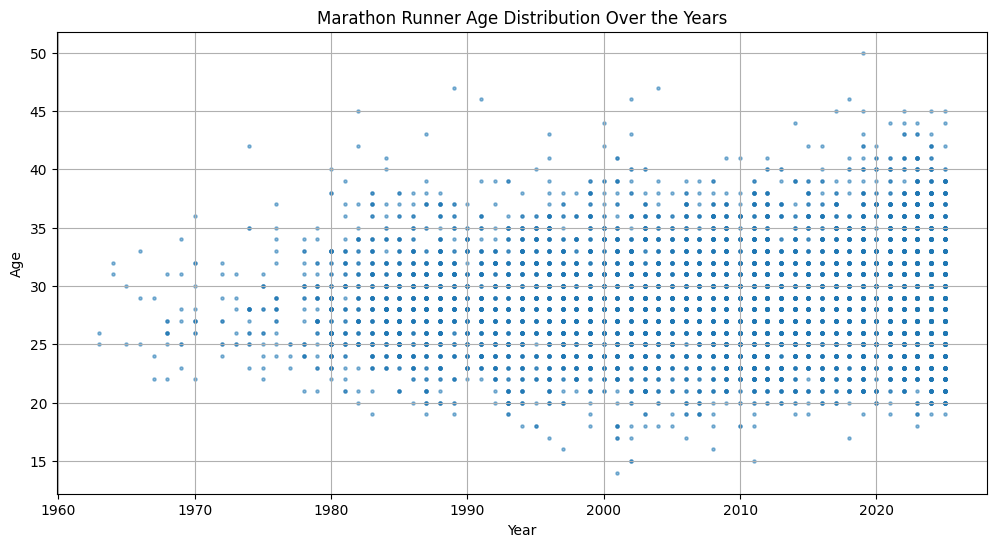

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.scatter(df['year'], df['Age'], alpha=0.5, s=5)
plt.xlabel('Year')
plt.ylabel('Age')
plt.title('Marathon Runner Age Distribution Over the Years')
plt.grid(True)
plt.show()

## Summary:

### Data Analysis Key Findings

*   The age of each runner was successfully calculated by subtracting their birth year from the marathon year.
*   The age distribution of marathon runners over the years was visualized using a scatter plot, with Year on the x-axis and Age on the y-axis.

### Insights or Next Steps

*   Analyze the scatter plot to identify any trends or patterns in the age distribution of marathon runners over time, such as an increase or decrease in the average age or the presence of distinct age groups.
*   Consider calculating summary statistics (e.g., mean, median, standard deviation) of the age for each year to quantify the age distribution and its changes over time.


## Count athletes per year

### Subtask:
Count the number of athletes for each year in the dataset.

**Reasoning**:
Group the DataFrame by the 'year' column and count the number of occurrences for each year.

In [4]:
athletes_per_year = df['year'].value_counts().sort_index()
display(athletes_per_year.head())

,count
year,
1963,2
1964,2
1965,2
1966,4
1967,3


## Plot the trend of athletes over the years

### Subtask:
Create a plot to visualize the number of athletes over the years.

**Reasoning**:
Use a line plot to show the trend of the number of athletes over the years.

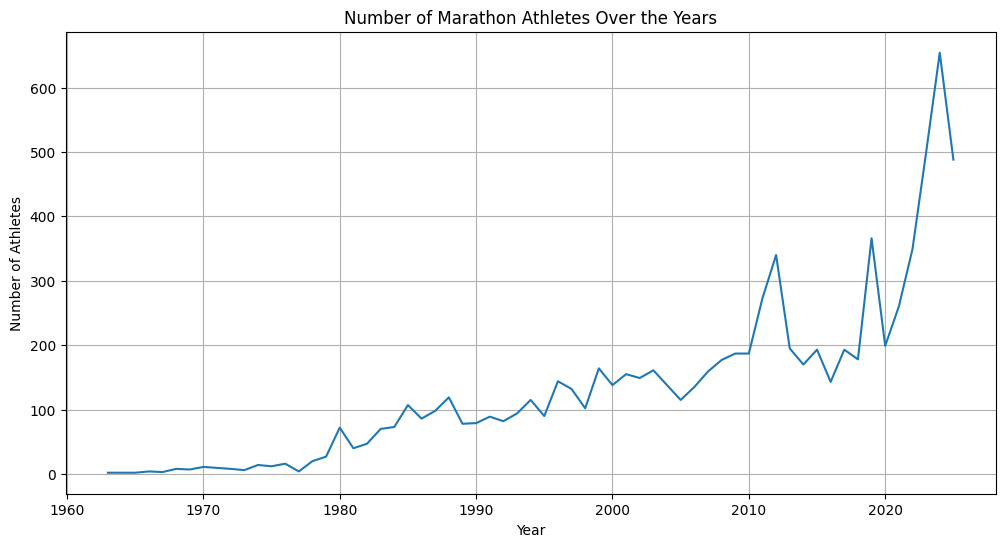

In [5]:
plt.figure(figsize=(12, 6))
plt.plot(athletes_per_year.index, athletes_per_year.values)
plt.xlabel('Year')
plt.ylabel('Number of Athletes')
plt.title('Number of Marathon Athletes Over the Years')
plt.grid(True)
plt.show()

# Task
Analyze the distribution of marathon runners by nationality over the years using the data in "/content/marathon.csv". Count the number of athletes per country per year and visualize how the distribution of nationalities has changed over time.

## Count athletes by year and country

### Subtask:
Group the DataFrame by 'year' and 'Country' and count the number of athletes for each combination.


**Reasoning**:
Group the DataFrame by year and Country, count the occurrences, reset the index, rename the count column, and display the head of the resulting DataFrame.



In [6]:
athletes_by_year_country = df.groupby(['year', 'Country']).size().reset_index(name='athlete_count')
display(athletes_by_year_country.head())

,year,Country,athlete_count
0,1963,GBR,1
1,1963,USA,1
2,1964,ETH,1
3,1964,GBR,1
4,1965,JPN,2


## Analyze changes in distribution

### Subtask:
Explore ways to visualize or analyze the changes in the distribution of nationalities over the years. This might involve looking at the top countries each year or visualizing the proportion of athletes from different countries over time.


**Reasoning**:
Calculate the total number of athletes per year, merge it with the existing DataFrame, calculate the proportion of athletes for each country per year, and identify the top countries by total athlete count across all years.



In [7]:
total_athletes_per_year = athletes_by_year_country.groupby('year')['athlete_count'].sum().reset_index(name='total_athletes_year')
athletes_by_year_country = pd.merge(athletes_by_year_country, total_athletes_per_year, on='year')
athletes_by_year_country['proportion'] = athletes_by_year_country['athlete_count'] / athletes_by_year_country['total_athletes_year']

top_countries = athletes_by_year_country.groupby('Country')['athlete_count'].sum().sort_values(ascending=False).head(15).index.tolist()

display(athletes_by_year_country.head())
display(top_countries)

,year,Country,athlete_count,total_athletes_year,proportion
0,1963,GBR,1,2,0.5
1,1963,USA,1,2,0.5
2,1964,ETH,1,2,0.5
3,1964,GBR,1,2,0.5
4,1965,JPN,2,2,1.0


['KEN',
 'JPN',
 'ETH',
 'USA',
 'CHN',
 'GBR',
 'MAR',
 'RUS',
 'ITA',
 'RSA',
 'FRA',
 'POL',
 'ESP',
 'MEX',
 'KOR']

## Visualize distribution changes

### Subtask:
Create a suitable plot (e.g., a stacked bar chart or an area plot) to visualize how the distribution of nationalities has changed over the years.


**Reasoning**:
Filter the data to include only the top countries, pivot the data for plotting, and create a stacked area plot to visualize the proportion of athletes from top countries over the years.



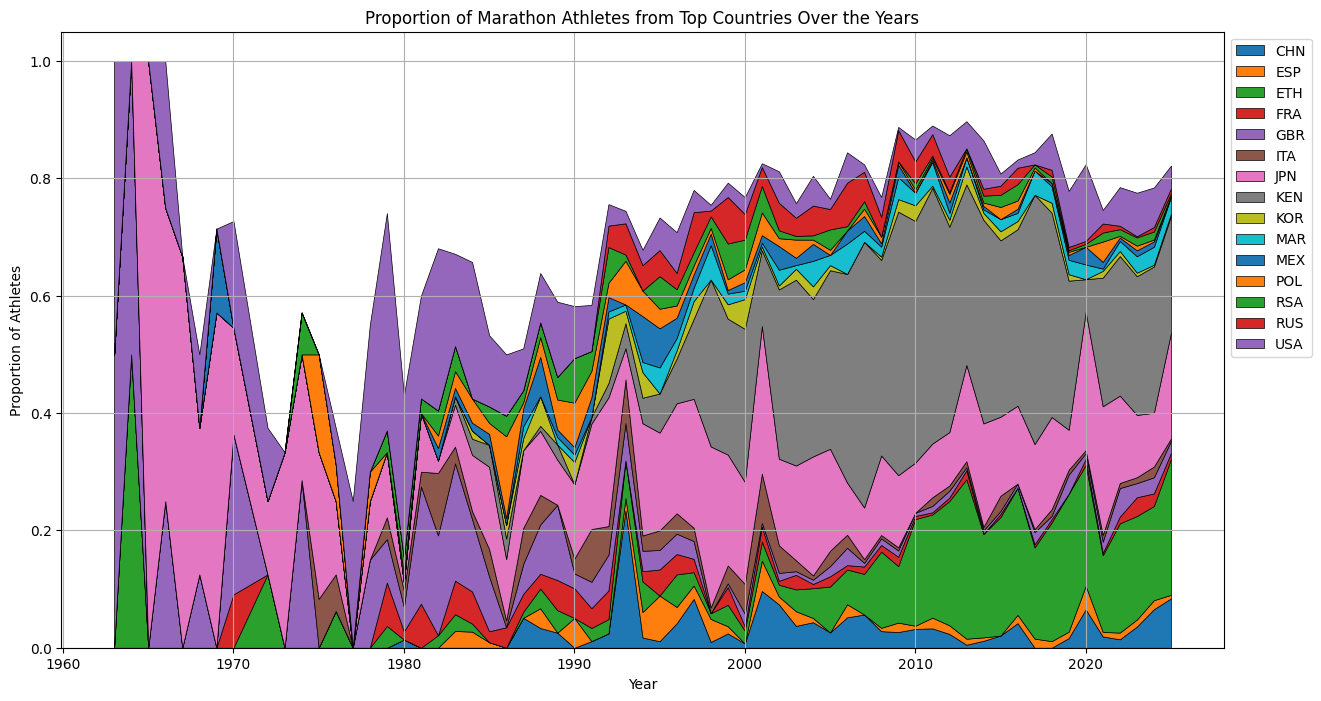

In [9]:
filtered_df = athletes_by_year_country[athletes_by_year_country['Country'].isin(top_countries)]
pivot_df = filtered_df.pivot(index='year', columns='Country', values='proportion').fillna(0)

plt.figure(figsize=(15, 8))
plt.stackplot(pivot_df.index, pivot_df.values.T, labels=pivot_df.columns, edgecolor='black', linewidth=0.5)
plt.xlabel('Year')
plt.ylabel('Proportion of Athletes')
plt.title('Proportion of Marathon Athletes from Top Countries Over the Years')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

## Summary:

### Data Analysis Key Findings

*   The number of athletes for each country in each year was successfully counted.
*   The proportion of athletes from each country within each year was calculated.
*   The top 15 countries with the highest overall athlete participation were identified.
*   A stacked area plot was generated visualizing the proportion of marathon athletes from the top countries over the years, showing the change in nationality distribution.

### Insights or Next Steps

*   Focus future analysis on the trends observed for the top countries, investigating factors that might influence the changes in their representation.
*   Consider analyzing the distribution of other relevant features (e.g., age, gender) for the top countries to gain deeper insights into participation patterns.


## Visualize individual country trends

### Subtask:
Create line plots for a selection of the top countries to visualize their individual trends in the proportion of athletes over the years.

**Reasoning**:
Select a subset of the top countries, and then iterate through this subset to create a line plot for each country showing their proportion of athletes over the years.

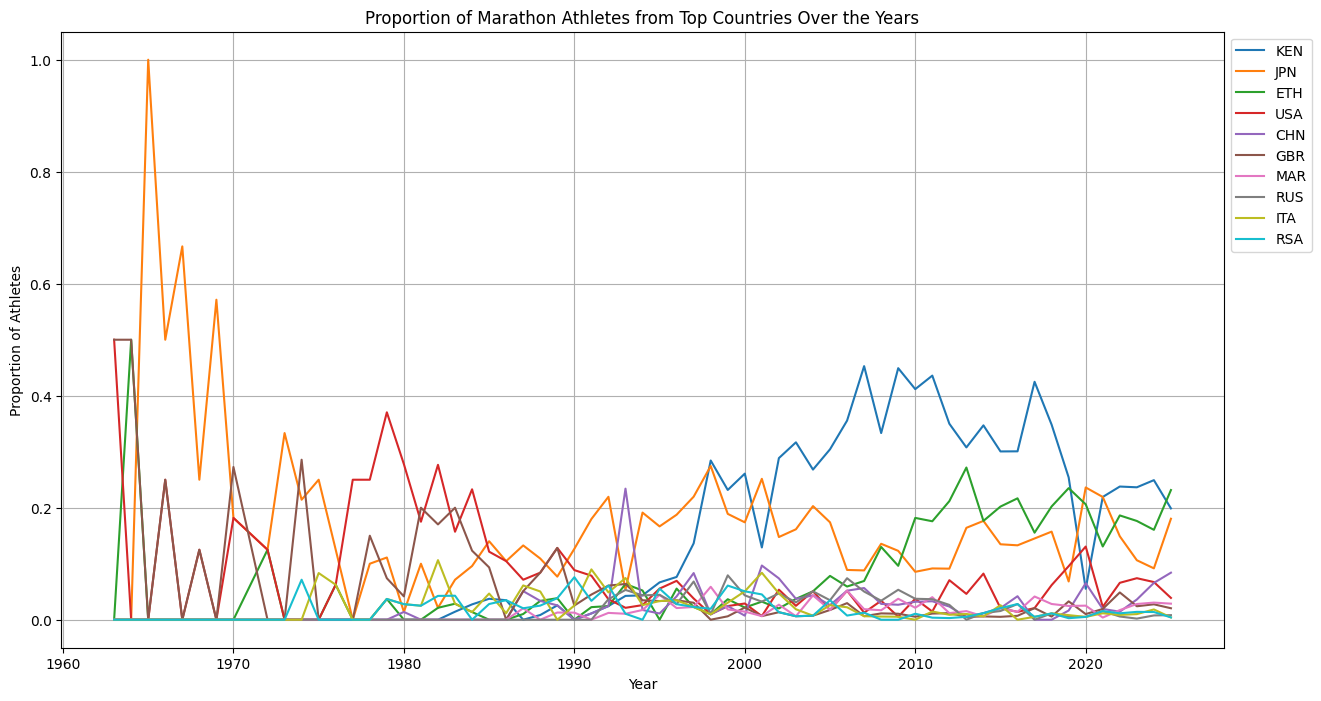

In [10]:
plt.figure(figsize=(15, 8))

# Select a subset of top countries to plot
countries_to_plot = top_countries[:10]  # Plotting top 10 for clarity

for country in countries_to_plot:
    country_data = pivot_df[country]
    plt.plot(country_data.index, country_data.values, label=country)

plt.xlabel('Year')
plt.ylabel('Proportion of Athletes')
plt.title('Proportion of Marathon Athletes from Top Countries Over the Years')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

## Visualize distribution changes

### Subtask:
Create a suitable plot (e.g., a stacked bar chart or an area plot) to visualize how the distribution of nationalities has changed over the years.

**Reasoning**:
Filter the data to include only the top countries, pivot the data for plotting, and create a stacked area plot to visualize the proportion of athletes from top countries over the years.

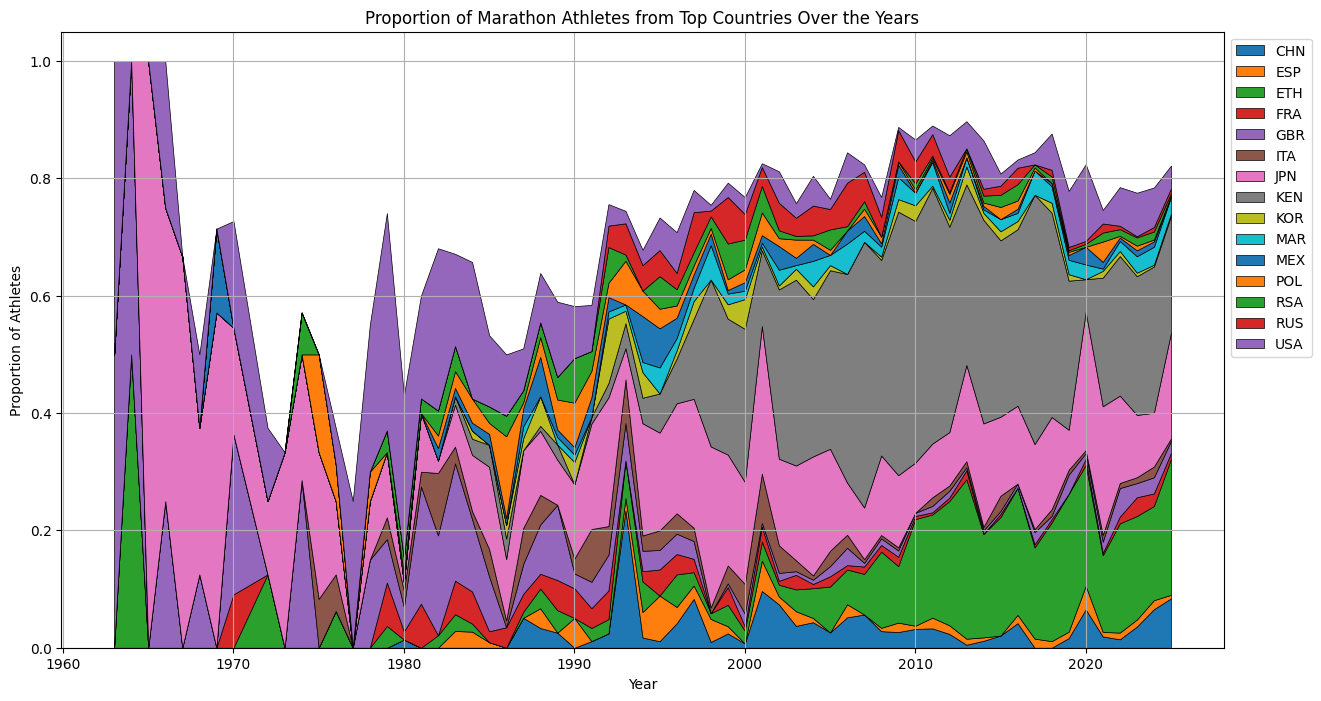

In [11]:
filtered_df = athletes_by_year_country[athletes_by_year_country['Country'].isin(top_countries)]
pivot_df = filtered_df.pivot(index='year', columns='Country', values='proportion').fillna(0)

plt.figure(figsize=(15, 8))
plt.stackplot(pivot_df.index, pivot_df.values.T, labels=pivot_df.columns, edgecolor='black', linewidth=0.5)
plt.xlabel('Year')
plt.ylabel('Proportion of Athletes')
plt.title('Proportion of Marathon Athletes from Top Countries Over the Years')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

# Task
Analyze and visualize the best running times by athlete nationality using the data in "/content/marathon.csv".

## Identify best times

### Subtask:
Determine the best running time for each athlete.


**Reasoning**:
Convert the 'Time' column to seconds, group by athlete name, find the minimum time for each athlete, and store the results in a new DataFrame.



In [12]:
def time_to_seconds(time_str):
    if pd.isna(time_str):
        return None
    parts = str(time_str).split(':')
    if len(parts) == 3:
        h, m, s = map(int, parts)
        return h * 3600 + m * 60 + s
    elif len(parts) == 2:
        m, s = map(int, parts)
        return m * 60 + s
    else:
        return None

df['Time_seconds'] = df['Time'].apply(time_to_seconds)

best_times = df.groupby('Name')['Time_seconds'].min().reset_index()
best_times = best_times.rename(columns={'Time_seconds': 'Best_Time_seconds'})

display(best_times.head())

,Name,Best_Time_seconds
0,. Ruwiyati,9269
1,Aadam Ismaeel Khamis,7679
2,Aamelmal Tagel,8678
3,Aaron Braun,7974
4,Aaron Gruen,7793


## Analyze best times by nationality

### Subtask:
Group the data by nationality and analyze the distribution of the best running times for each country.


**Reasoning**:
Merge the dataframes, group by country, calculate descriptive statistics for the best times, sort by mean best time, and display the results to analyze the distribution of best times by nationality.



In [13]:
merged_df = pd.merge(df, best_times, on='Name', how='inner')

country_best_times_stats = merged_df.groupby('Country')['Best_Time_seconds'].agg(['count', 'mean', 'median', 'std', 'min', 'max']).reset_index()

country_best_times_stats_sorted = country_best_times_stats.sort_values(by='mean')

display(country_best_times_stats_sorted.head())
display(country_best_times_stats_sorted.tail())

,Country,count,mean,median,std,min,max
69,MKD,1,7706.0,7706.0,NaN,7706,7706
92,SOM,1,7749.0,7749.0,NaN,7749,7749
77,PAN,1,7764.0,7764.0,NaN,7764,7764
78,PAR,1,7811.0,7811.0,NaN,7811,7811
4,ART,2,7813.5,7813.5,103.944697,7740,7887


,Country,count,mean,median,std,min,max
47,HKG,1,9084.000000,9084.0,NaN,9084,9084
90,SGP,1,9144.000000,9144.0,NaN,9144,9144
49,INA,3,9157.333333,9109.0,96.996564,9094,9269
94,SSD,1,9202.000000,9202.0,NaN,9202,9202
11,BIH,1,9297.000000,9297.0,NaN,9297,9297


## Visualize best times by nationality

### Subtask:
Create a suitable plot to visualize the distribution of best running times for each nationality.


**Reasoning**:
Filter the data to include countries with a sufficient number of athletes, create a box plot of the best times for these countries, order the box plots, add labels and a title, and display the plot.



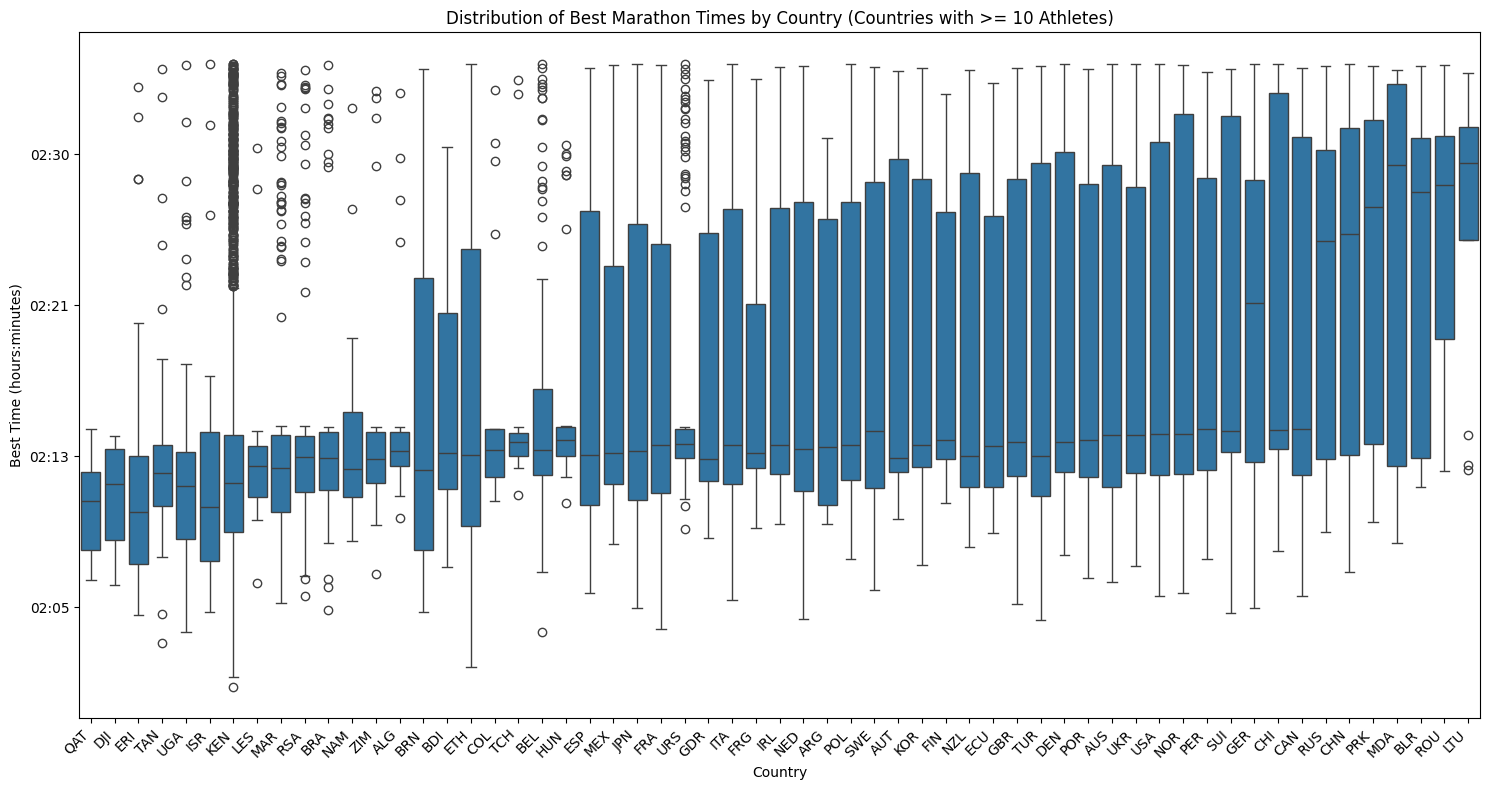

In [16]:
import seaborn as sns
import matplotlib.ticker as mticker

# Filter countries with at least 10 athletes
filtered_country_stats = country_best_times_stats_sorted[country_best_times_stats_sorted['count'] >= 10].sort_values(by='mean')
countries_to_plot = filtered_country_stats['Country'].tolist()

# Filter the original merged_df to include only the selected countries
filtered_merged_df = merged_df[merged_df['Country'].isin(countries_to_plot)]

# Create a box plot
plt.figure(figsize=(15, 8))
sns.boxplot(x='Country', y='Best_Time_seconds', data=filtered_merged_df, order=countries_to_plot)
plt.xlabel('Country')
plt.ylabel('Best Time (hours:minutes)')
plt.title('Distribution of Best Marathon Times by Country (Countries with >= 10 Athletes)')
plt.xticks(rotation=45, ha='right')

# Function to format seconds as hours:minutes
def seconds_to_hours_minutes(x, pos):
    hours = int(x // 3600)
    minutes = int((x % 3600) // 60)
    return f'{hours:02d}:{minutes:02d}'

# Apply the formatter to the y-axis
formatter = mticker.FuncFormatter(seconds_to_hours_minutes)
plt.gca().yaxis.set_major_formatter(formatter)


plt.tight_layout()
plt.show()

## Summary:

### Data Analysis Key Findings

*   The best running time for each athlete was successfully identified and recorded in seconds.
*   Descriptive statistics (count, mean, median, standard deviation, minimum, and maximum) of best running times were calculated for each country.
*   Countries with at least 10 athletes in the dataset were identified and included in the visualization.
*   The box plot shows the distribution of best running times for these selected countries, ordered by their mean best time.

### Insights or Next Steps

*   The box plot provides a visual comparison of the spread and central tendency of best marathon times across different nationalities.
*   Further analysis could involve investigating potential factors contributing to the differences in performance between countries, such as training methods, climate, or access to resources.


## Fastest athlete per country

### Subtask:
Identify the fastest athlete for each country.

**Reasoning**:
Group the merged DataFrame by 'Country', find the index of the minimum 'Best_Time_seconds' for each country, and then use these indices to select the corresponding rows from the DataFrame. Finally, display the relevant columns.

In [18]:
# Find the index of the minimum best time for each country
idx_fastest = merged_df.groupby('Country')['Best_Time_seconds'].idxmin()

# Use these indices to select the rows with the fastest times
fastest_athletes_per_country = merged_df.loc[idx_fastest]

# Function to format seconds as hours:minutes:seconds
def seconds_to_hms(seconds):
    if pd.isna(seconds):
        return None
    hours = int(seconds // 3600)
    minutes = int((seconds % 3600) // 60)
    seconds = int(seconds % 60)
    return f'{hours:02d}:{minutes:02d}:{seconds:02d}'

# Apply the formatting function to create a new column
fastest_athletes_per_country['Best_Time_hms'] = fastest_athletes_per_country['Best_Time_seconds'].apply(seconds_to_hms)


# Display the Country, Name, and Best_Time_seconds
display(fastest_athletes_per_country[['Country', 'Name', 'Best_Time_hms']])

,Country,Name,Best_Time_hms
3035,ALG,Rachid Ziar,02:09:54
7574,AND,Antoni Bernadó,02:14:25
5130,ANG,Joao Baptista N'Tyamba,02:11:40
2749,ARG,Joaquin Arbe,02:09:36
2242,ART,Tachlowini Gabriyesos,02:09:00
...,...,...,...
365,USA,Khalid Khannouchi,02:05:38
895,UZB,Shokhrukh Davlyatov,02:07:02
4790,VEN,Carlos Tarazona,02:11:25
5947,YUG,Sreten Ninković,02:12:39


In [20]:
# Set pandas option to display all rows
pd.set_option('display.max_rows', None)

# Display the DataFrame
display(fastest_athletes_per_country[['Country', 'Name', 'Best_Time_hms']].sort_values(by='Country'))

# Reset pandas option to default
pd.reset_option('display.max_rows')

,Country,Name,Best_Time_hms
3035,ALG,Rachid Ziar,02:09:54
7574,AND,Antoni Bernadó,02:14:25
5130,ANG,Joao Baptista N'Tyamba,02:11:40
2749,ARG,Joaquin Arbe,02:09:36
2242,ART,Tachlowini Gabriyesos,02:09:00
6916,ARU,Kim Reynierse,02:13:43
571,AUS,Andrew Buchanan,02:06:22
3007,AUT,Aaron Gruen,02:09:53
4735,AZE,Tilahun Aliyev,02:11:22
1011,BDI,Olivier Irabaruta,02:07:13


## Best running times by gender and age

### Subtask:
Calculate the best running times in hh:mm:ss grouped by gender and age of the athlete.

**Reasoning**:
Group the DataFrame by 'Gender' and 'Age', find the minimum 'Best_Time_seconds' for each group, apply the time formatting function, and display the results.

In [21]:
best_times_by_gender_age = merged_df.groupby(['Gender', 'Age'])['Best_Time_seconds'].min().reset_index()

# Apply the formatting function to create a new column
best_times_by_gender_age['Best_Time_hms'] = best_times_by_gender_age['Best_Time_seconds'].apply(seconds_to_hms)

display(best_times_by_gender_age[['Gender', 'Age', 'Best_Time_hms']].sort_values(by=['Gender', 'Age']))

,Gender,Age,Best_Time_hms
0,Men,14.0,02:10:47
1,Men,15.0,02:13:10
2,Men,17.0,02:11:43
3,Men,18.0,02:06:36
4,Men,19.0,02:04:32
...,...,...,...
62,Women,44.0,02:23:15
63,Women,45.0,02:21:34
64,Women,46.0,02:29:00
65,Women,47.0,02:31:05


## Visualize best running times by gender and age

### Subtask:
Create a plot to visualize the best running times by gender and age.

**Reasoning**:
Use a scatter plot or line plot to visualize the best running times against age, with different colors or markers for each gender, to show the trends in best times by gender and age.

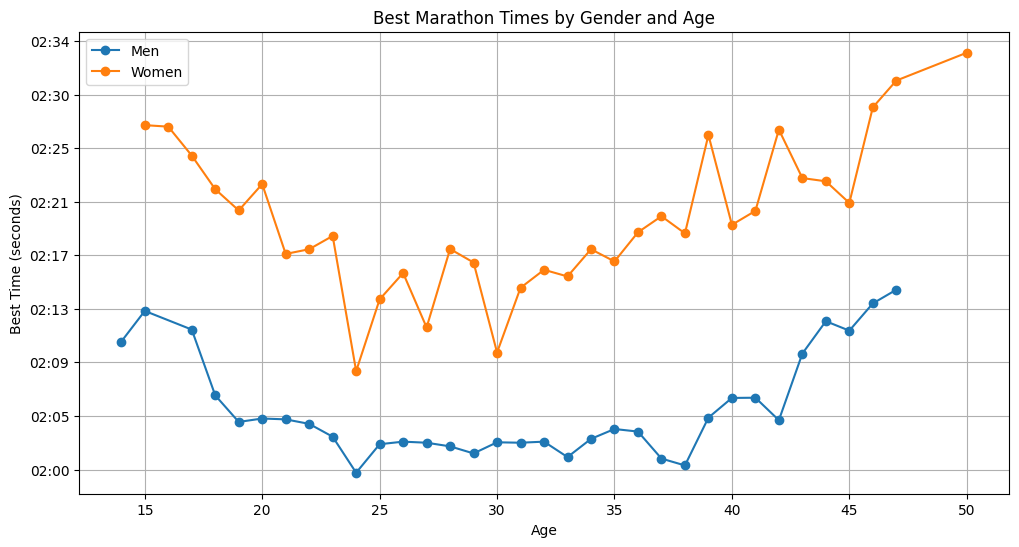

In [22]:
plt.figure(figsize=(12, 6))

for gender in best_times_by_gender_age['Gender'].unique():
    gender_data = best_times_by_gender_age[best_times_by_gender_age['Gender'] == gender]
    plt.plot(gender_data['Age'], gender_data['Best_Time_seconds'], marker='o', linestyle='-', label=gender)

plt.xlabel('Age')
plt.ylabel('Best Time (seconds)')
plt.title('Best Marathon Times by Gender and Age')
plt.legend()
plt.grid(True)

# Apply the formatter to the y-axis
formatter = mticker.FuncFormatter(seconds_to_hours_minutes)
plt.gca().yaxis.set_major_formatter(formatter)


plt.show()

# Task
Analyze the career length of marathon runners in the dataset "/content/marathon.csv".

## Identify first and last participation years

### Subtask:
For each runner, find the earliest and latest year they appear in the dataset.


**Reasoning**:
Group the DataFrame by 'Name' and calculate the minimum and maximum year for each runner to find their earliest and latest participation years.



In [23]:
career_years = df.groupby('Name')['year'].agg(['min', 'max']).reset_index()
career_years = career_years.rename(columns={'min': 'First_Year', 'max': 'Last_Year'})
display(career_years.head())

,Name,First_Year,Last_Year
0,. Ruwiyati,1995,1995
1,Aadam Ismaeel Khamis,2011,2011
2,Aamelmal Tagel,2025,2025
3,Aaron Braun,2015,2015
4,Aaron Gruen,2025,2025


## Calculate career length

### Subtask:
Calculate the difference between the last and first participation year for each runner to determine their career length.


**Reasoning**:
Calculate the career length by subtracting the first participation year from the last participation year and display the head of the updated DataFrame.



In [24]:
career_years['Career_Length'] = career_years['Last_Year'] - career_years['First_Year']
display(career_years.head())

,Name,First_Year,Last_Year,Career_Length
0,. Ruwiyati,1995,1995,0
1,Aadam Ismaeel Khamis,2011,2011,0
2,Aamelmal Tagel,2025,2025,0
3,Aaron Braun,2015,2015,0
4,Aaron Gruen,2025,2025,0


## Analyze career length distribution

### Subtask:
Analyze the distribution of career lengths (e.g., calculate descriptive statistics, create a histogram).


**Reasoning**:
Calculate and display descriptive statistics for the 'Career_Length' column.



In [25]:
career_length_stats = career_years['Career_Length'].describe()
display(career_length_stats)

,Career_Length
count,8200.000000
mean,0.030488
std,0.789180
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,39.000000


**Reasoning**:
Create a histogram to visualize the distribution of career lengths.



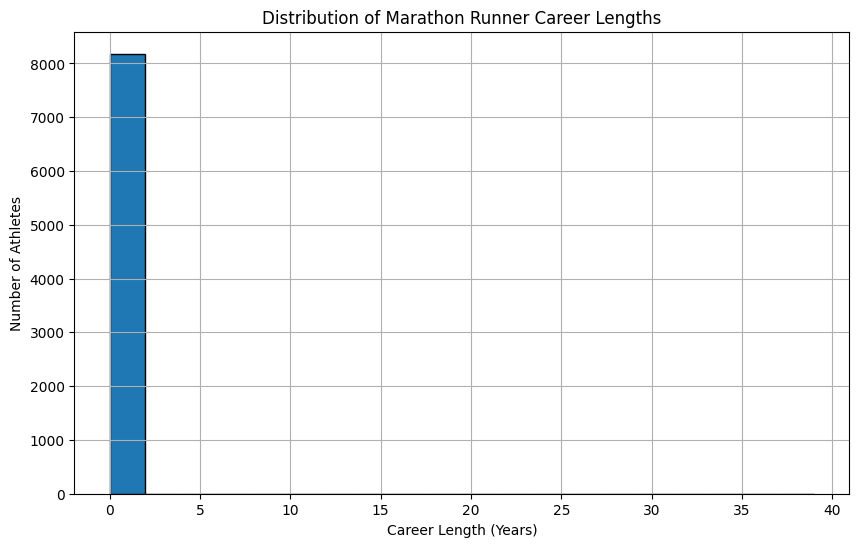

In [26]:
plt.figure(figsize=(10, 6))
plt.hist(career_years['Career_Length'], bins=20, edgecolor='black')
plt.xlabel('Career Length (Years)')
plt.ylabel('Number of Athletes')
plt.title('Distribution of Marathon Runner Career Lengths')
plt.grid(True)
plt.show()

## Visualize career length distribution

### Subtask:
Create a plot to visualize the distribution of career lengths.


**Reasoning**:
Create a histogram to visualize the distribution of career lengths as requested in the subtask.



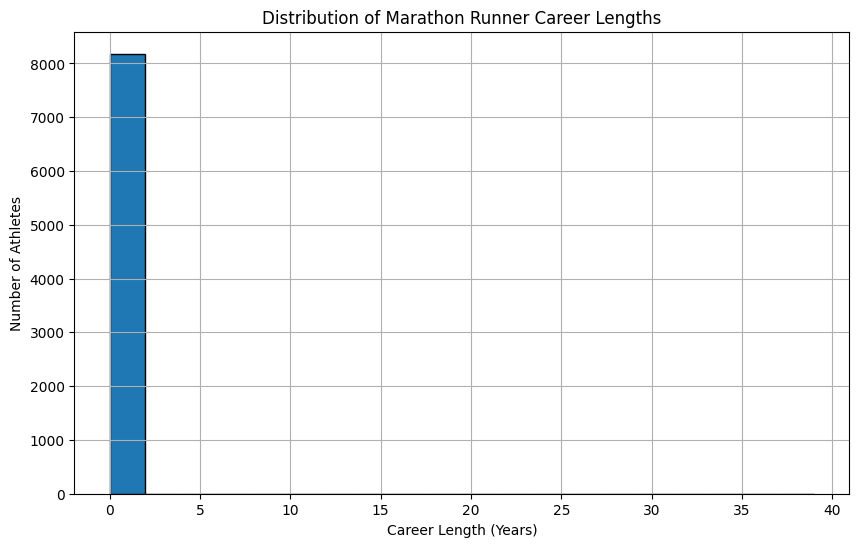

In [27]:
plt.figure(figsize=(10, 6))
plt.hist(career_years['Career_Length'], bins=20, edgecolor='black')
plt.xlabel('Career Length (Years)')
plt.ylabel('Number of Athletes')
plt.title('Distribution of Marathon Runner Career Lengths')
plt.grid(True)
plt.show()

## Summary:

### Data Analysis Key Findings

*   The average career length for runners in the dataset is approximately 0.03 years, with a standard deviation of about 0.79 years, indicating a highly skewed distribution.
*   The median and 75th percentile career lengths are both 0 years, suggesting that a significant majority of athletes in the dataset participated in only one event.
*   Despite the low average, the maximum observed career length in the dataset is 39 years, highlighting the presence of a small number of runners with very long participation histories.
*   The histogram visually confirms the skewed distribution, showing a large peak at 0 years and a long tail representing the smaller number of athletes with longer careers.

### Insights or Next Steps

*   Investigate the characteristics of runners with longer careers (\>0 years) compared to those with a career length of 0 years to understand factors contributing to sustained participation.
*   Consider if the dataset captures the complete career of all runners or if it represents a snapshot, which could influence the interpretation of career length.


## Count total athletes by country (all years)

### Subtask:
Count the total number of athletes for each country across all years in the dataset.

**Reasoning**:
Group the DataFrame by 'Country' and count the number of athletes for each country across all years, then sort the results and display the head.

In [28]:
total_athletes_by_country = df['Country'].value_counts().reset_index(name='total_athlete_count')
total_athletes_by_country = total_athletes_by_country.rename(columns={'index': 'Country'})
display(total_athletes_by_country.head())

,Country,total_athlete_count
0,KEN,1913
1,JPN,1154
2,ETH,1048
3,USA,498
4,CHN,297


## Visualize total athletes by country

### Subtask:
Create a bar chart to visualize the total number of athletes for each country.

**Reasoning**:
Use a bar chart to visualize the total number of athletes per country. Since there are many countries, I'll select the top 20 for clarity in the visualization.

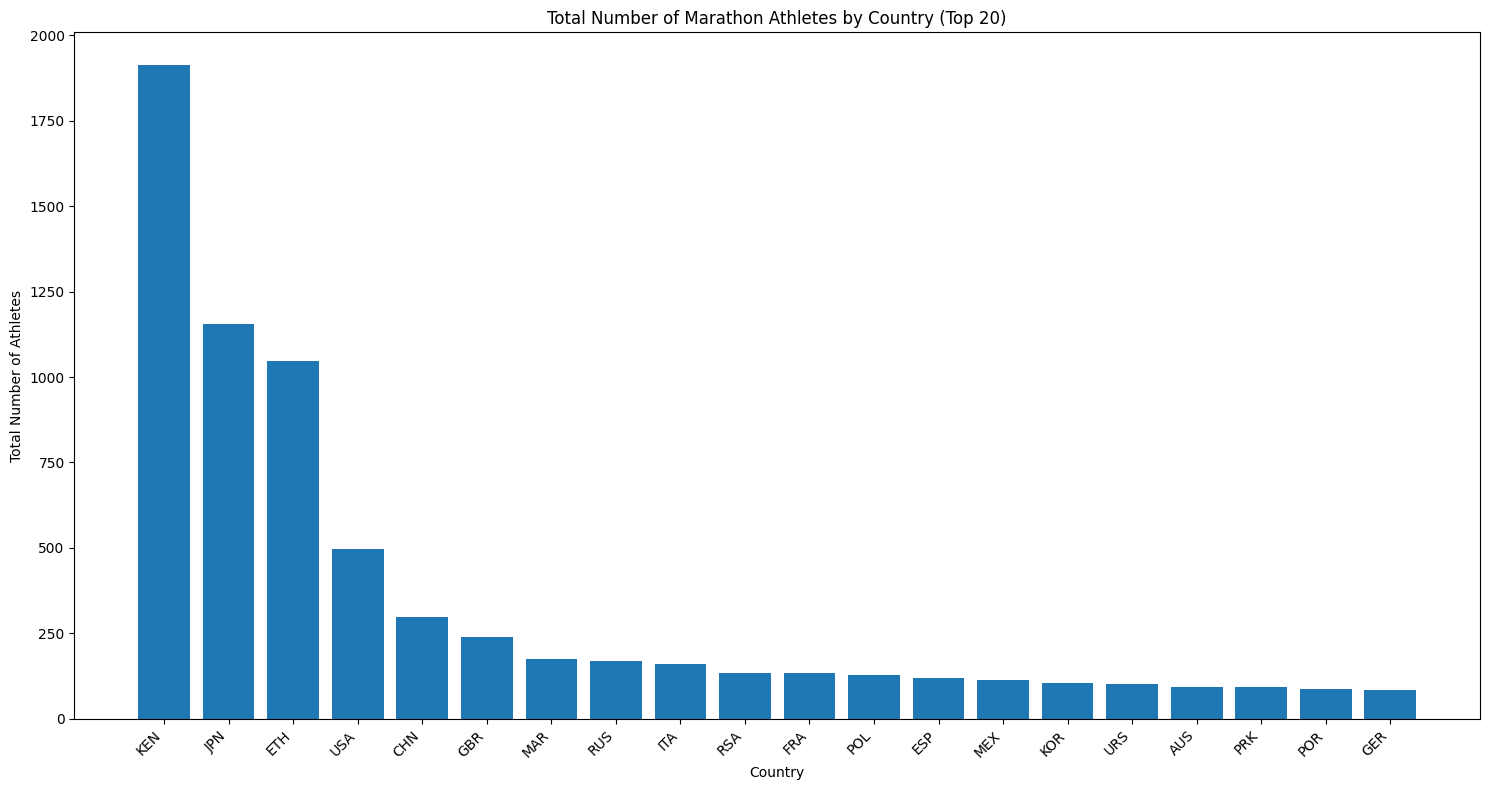

In [29]:
# Select the top 20 countries by total athlete count for visualization
top_countries_total = total_athletes_by_country.head(20)

plt.figure(figsize=(15, 8))
plt.bar(top_countries_total['Country'], top_countries_total['total_athlete_count'])
plt.xlabel('Country')
plt.ylabel('Total Number of Athletes')
plt.title('Total Number of Marathon Athletes by Country (Top 20)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

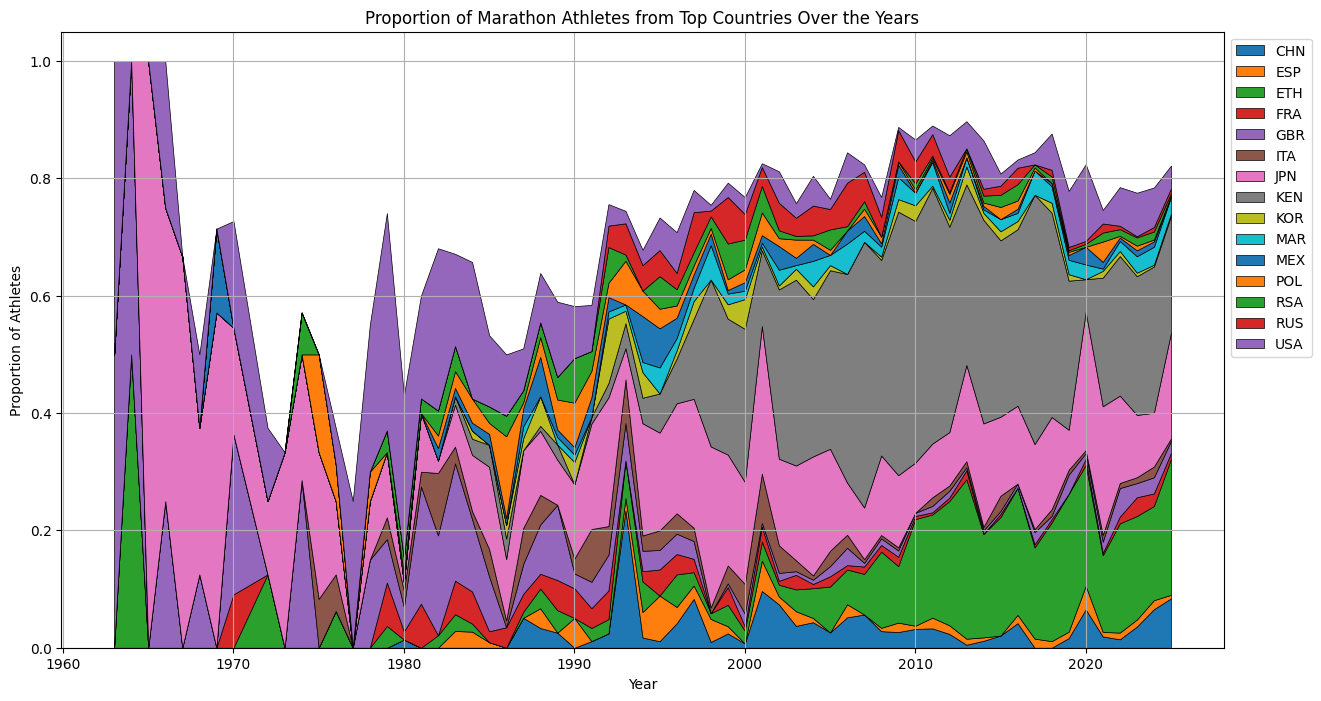

In [ ]:
filtered_df = athletes_by_year_country[athletes_by_year_country['Country'].isin(top_countries)]
pivot_df = filtered_df.pivot(index='year', columns='Country', values='proportion').fillna(0)

plt.figure(figsize=(15, 8))
plt.stackplot(pivot_df.index, pivot_df.values.T, labels=pivot_df.columns, edgecolor='black', linewidth=0.5)
plt.xlabel('Year')
plt.ylabel('Proportion of Athletes')
plt.title('Proportion of Marathon Athletes from Top Countries Over the Years')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

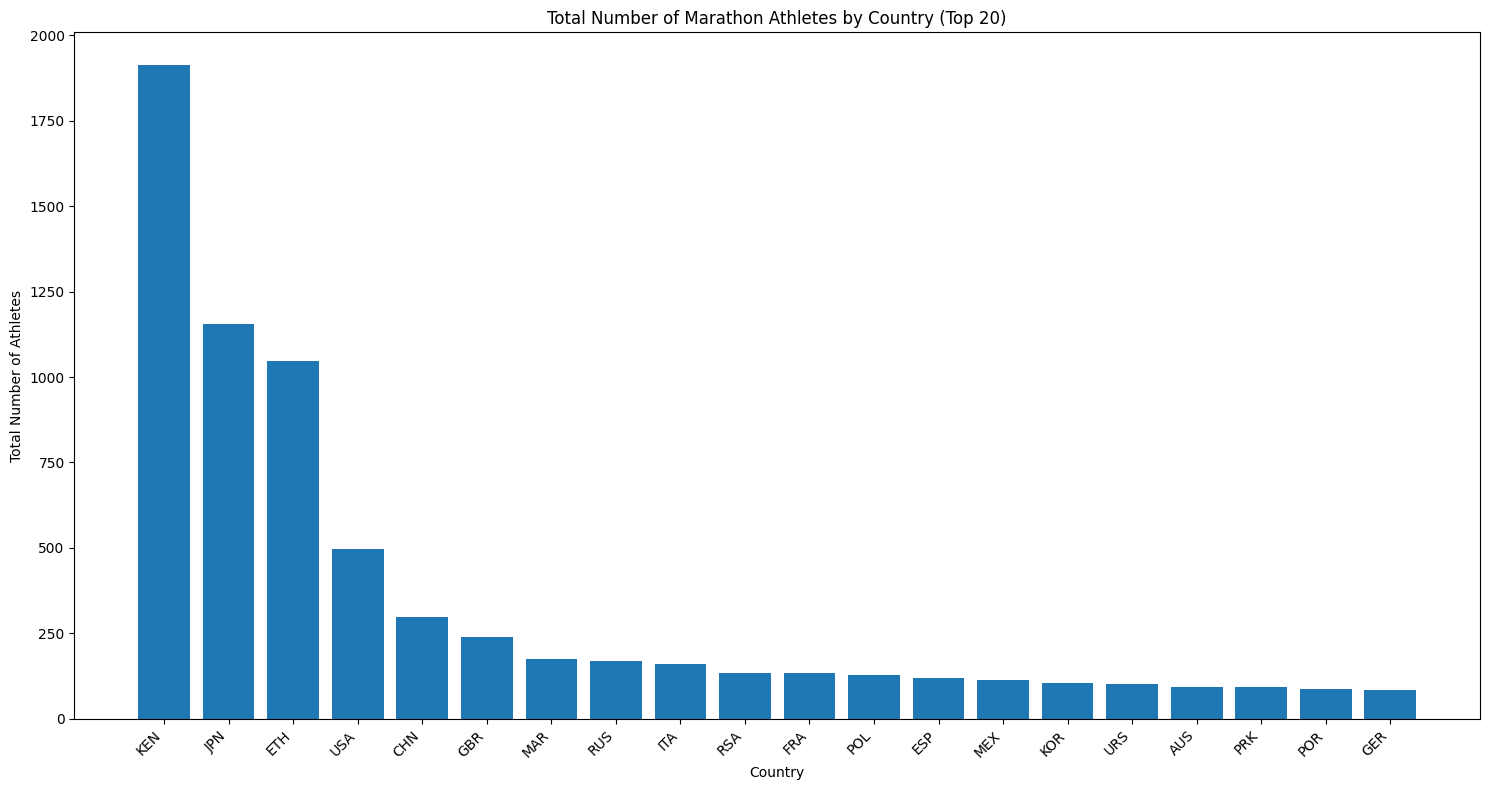

In [ ]:
# Select the top 20 countries by total athlete count for visualization
top_countries_total = total_athletes_by_country.head(20)

plt.figure(figsize=(15, 8))
plt.bar(top_countries_total['Country'], top_countries_total['total_athlete_count'])
plt.xlabel('Country')
plt.ylabel('Total Number of Athletes')
plt.title('Total Number of Marathon Athletes by Country (Top 20)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

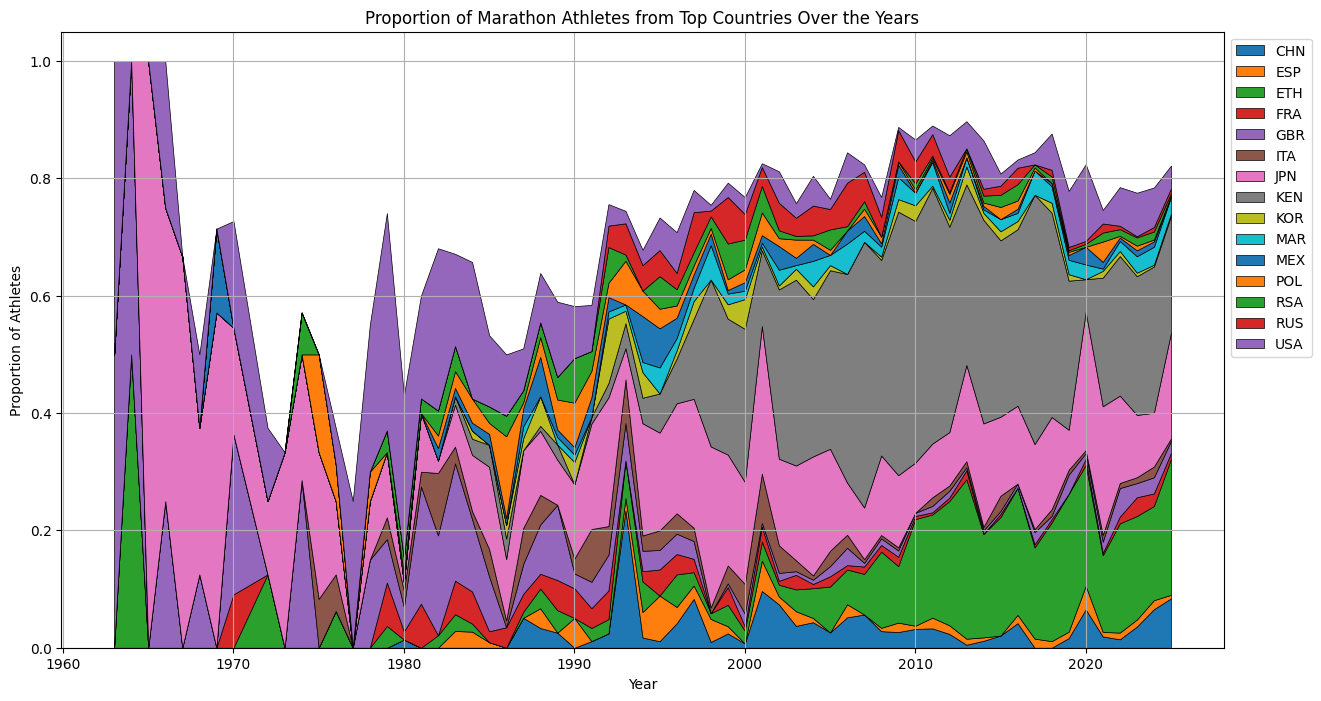

In [ ]:
filtered_df = athletes_by_year_country[athletes_by_year_country['Country'].isin(top_countries)]
pivot_df = filtered_df.pivot(index='year', columns='Country', values='proportion').fillna(0)

plt.figure(figsize=(15, 8))
plt.stackplot(pivot_df.index, pivot_df.values.T, labels=pivot_df.columns, edgecolor='black', linewidth=0.5)
plt.xlabel('Year')
plt.ylabel('Proportion of Athletes')
plt.title('Proportion of Marathon Athletes from Top Countries Over the Years')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

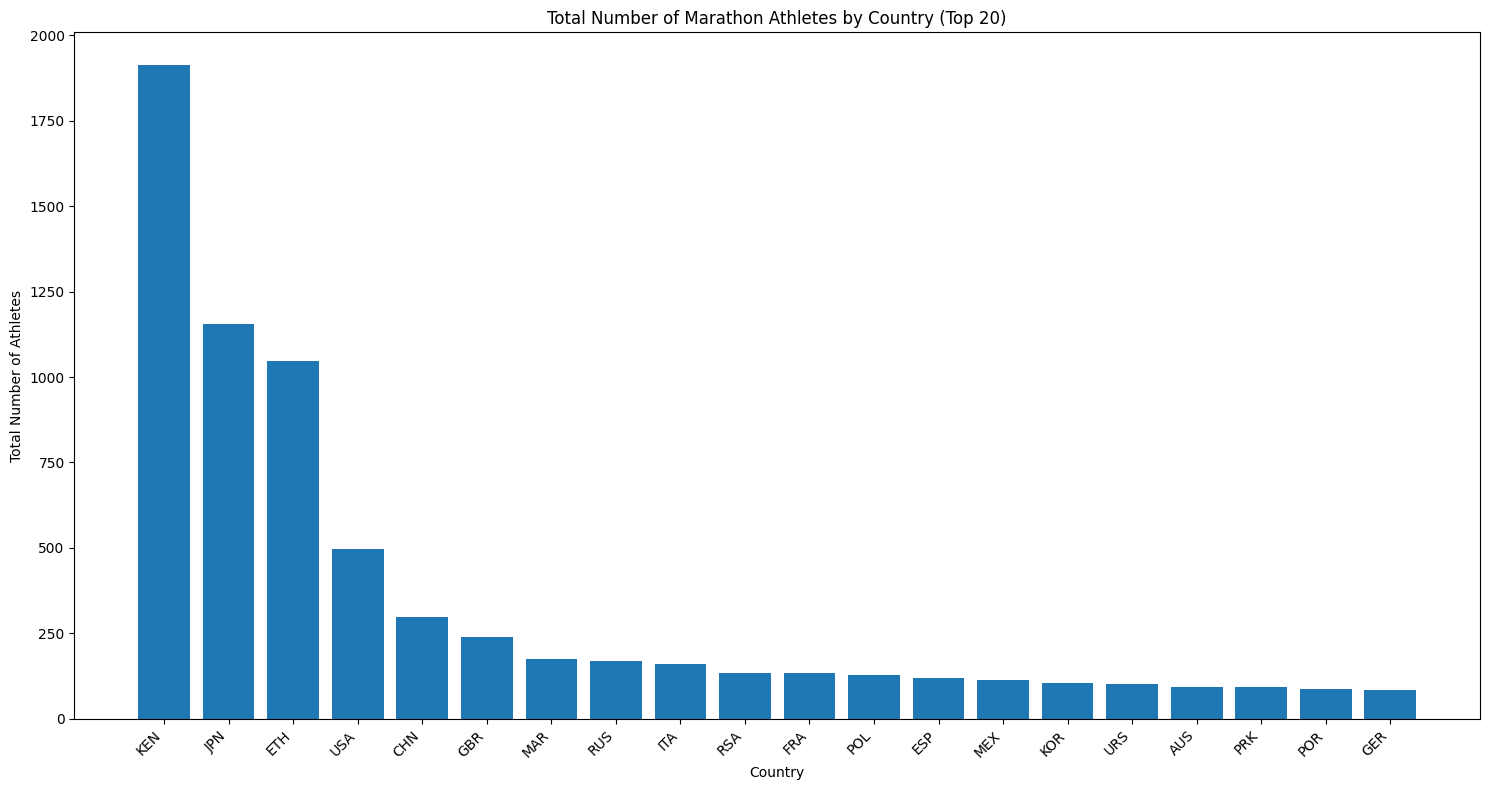

In [ ]:
# Select the top 20 countries by total athlete count for visualization
top_countries_total = total_athletes_by_country.head(20)

plt.figure(figsize=(15, 8))
plt.bar(top_countries_total['Country'], top_countries_total['total_athlete_count'])
plt.xlabel('Country')
plt.ylabel('Total Number of Athletes')
plt.title('Total Number of Marathon Athletes by Country (Top 20)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

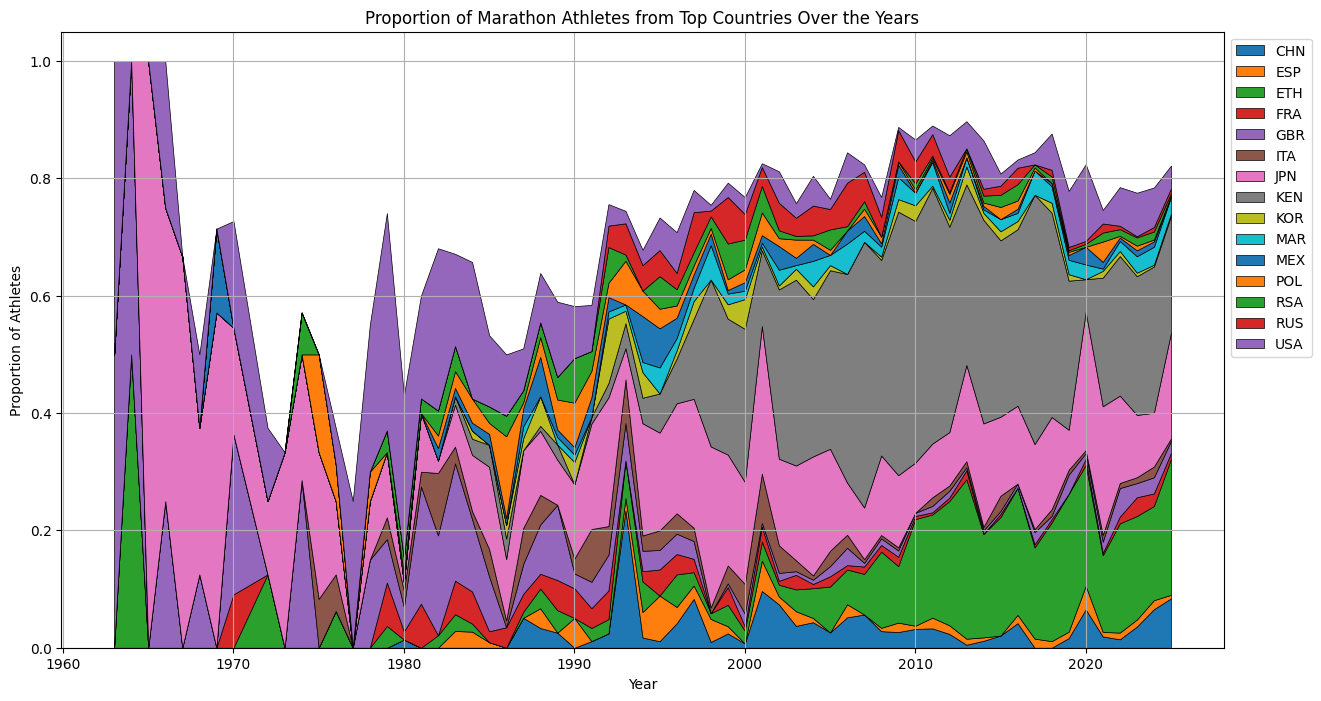

In [ ]:
filtered_df = athletes_by_year_country[athletes_by_year_country['Country'].isin(top_countries)]
pivot_df = filtered_df.pivot(index='year', columns='Country', values='proportion').fillna(0)

plt.figure(figsize=(15, 8))
plt.stackplot(pivot_df.index, pivot_df.values.T, labels=pivot_df.columns, edgecolor='black', linewidth=0.5)
plt.xlabel('Year')
plt.ylabel('Proportion of Athletes')
plt.title('Proportion of Marathon Athletes from Top Countries Over the Years')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

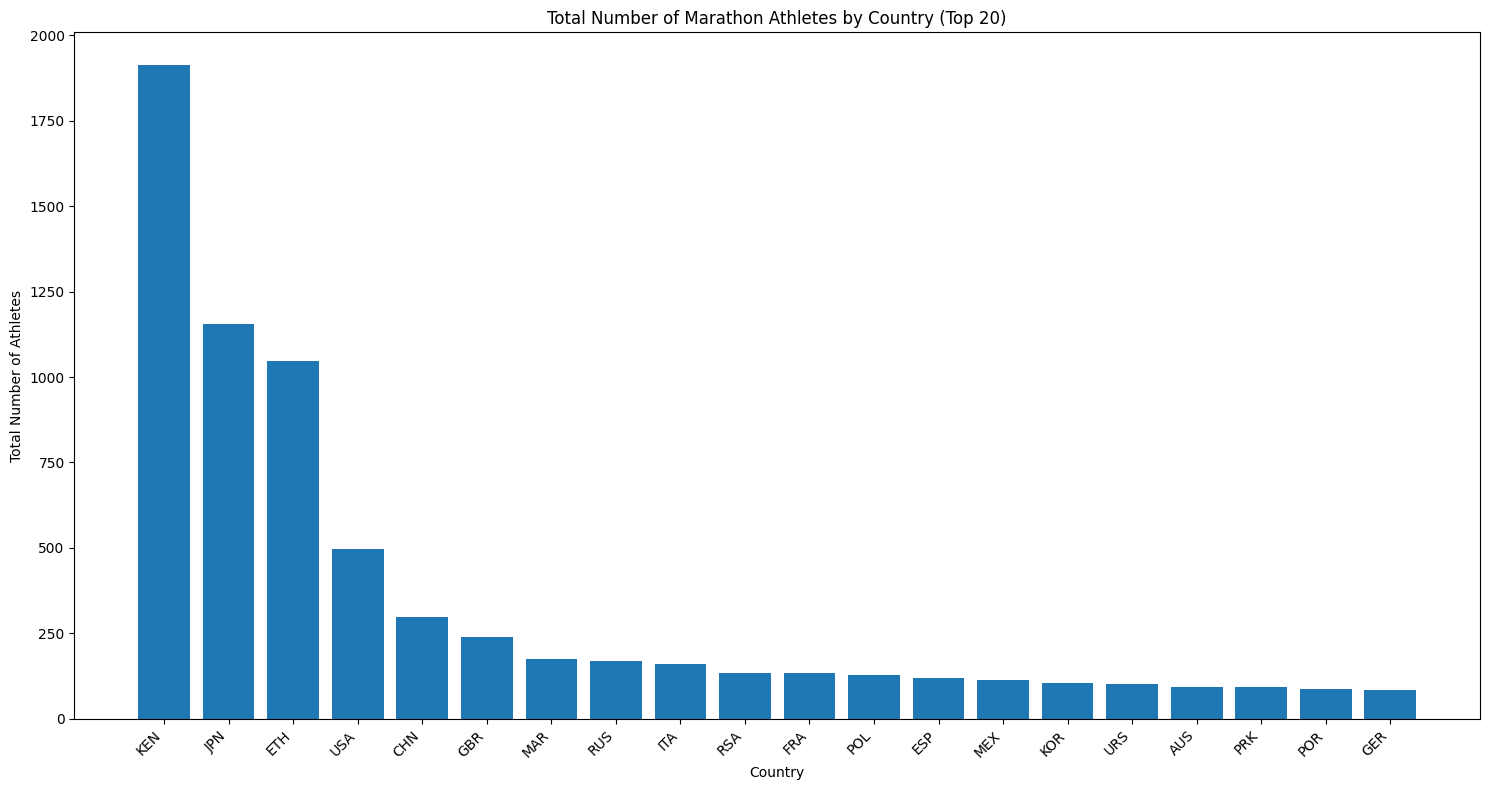

In [ ]:
# Select the top 20 countries by total athlete count for visualization
top_countries_total = total_athletes_by_country.head(20)

plt.figure(figsize=(15, 8))
plt.bar(top_countries_total['Country'], top_countries_total['total_athlete_count'])
plt.xlabel('Country')
plt.ylabel('Total Number of Athletes')
plt.title('Total Number of Marathon Athletes by Country (Top 20)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

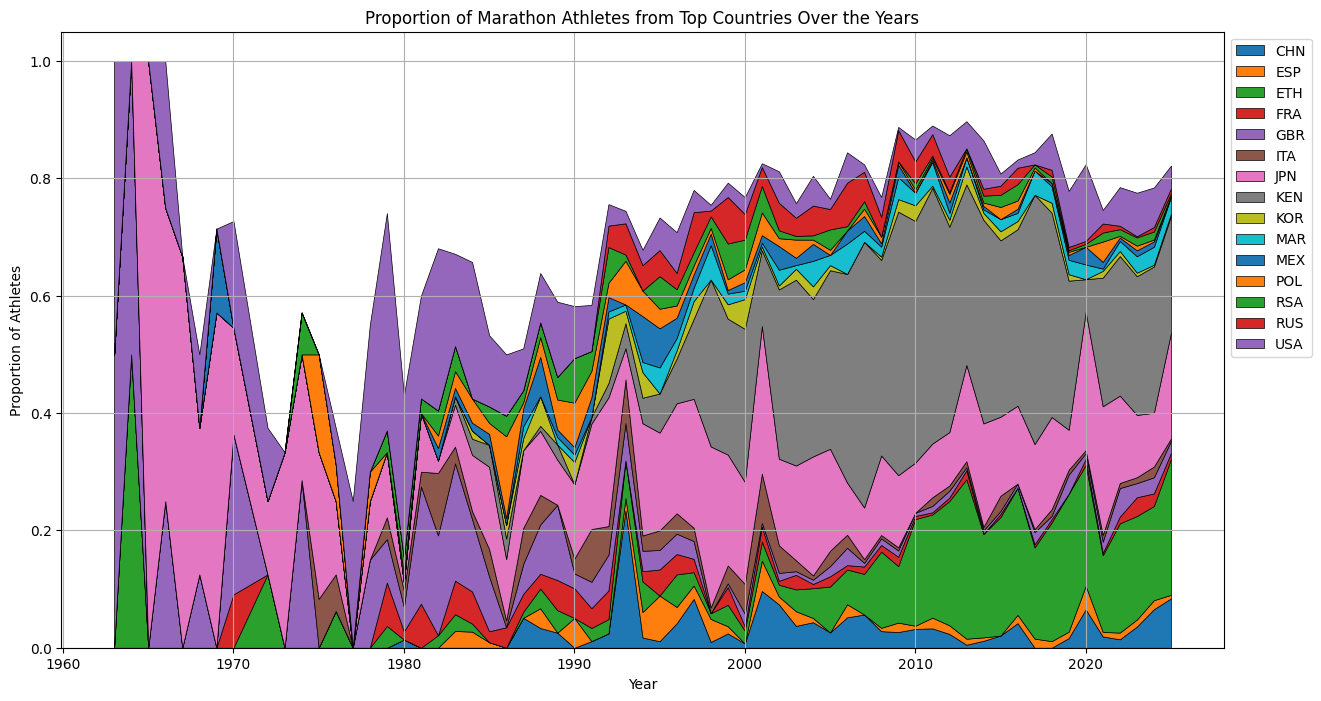

In [ ]:
filtered_df = athletes_by_year_country[athletes_by_year_country['Country'].isin(top_countries)]
pivot_df = filtered_df.pivot(index='year', columns='Country', values='proportion').fillna(0)

plt.figure(figsize=(15, 8))
plt.stackplot(pivot_df.index, pivot_df.values.T, labels=pivot_df.columns, edgecolor='black', linewidth=0.5)
plt.xlabel('Year')
plt.ylabel('Proportion of Athletes')
plt.title('Proportion of Marathon Athletes from Top Countries Over the Years')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

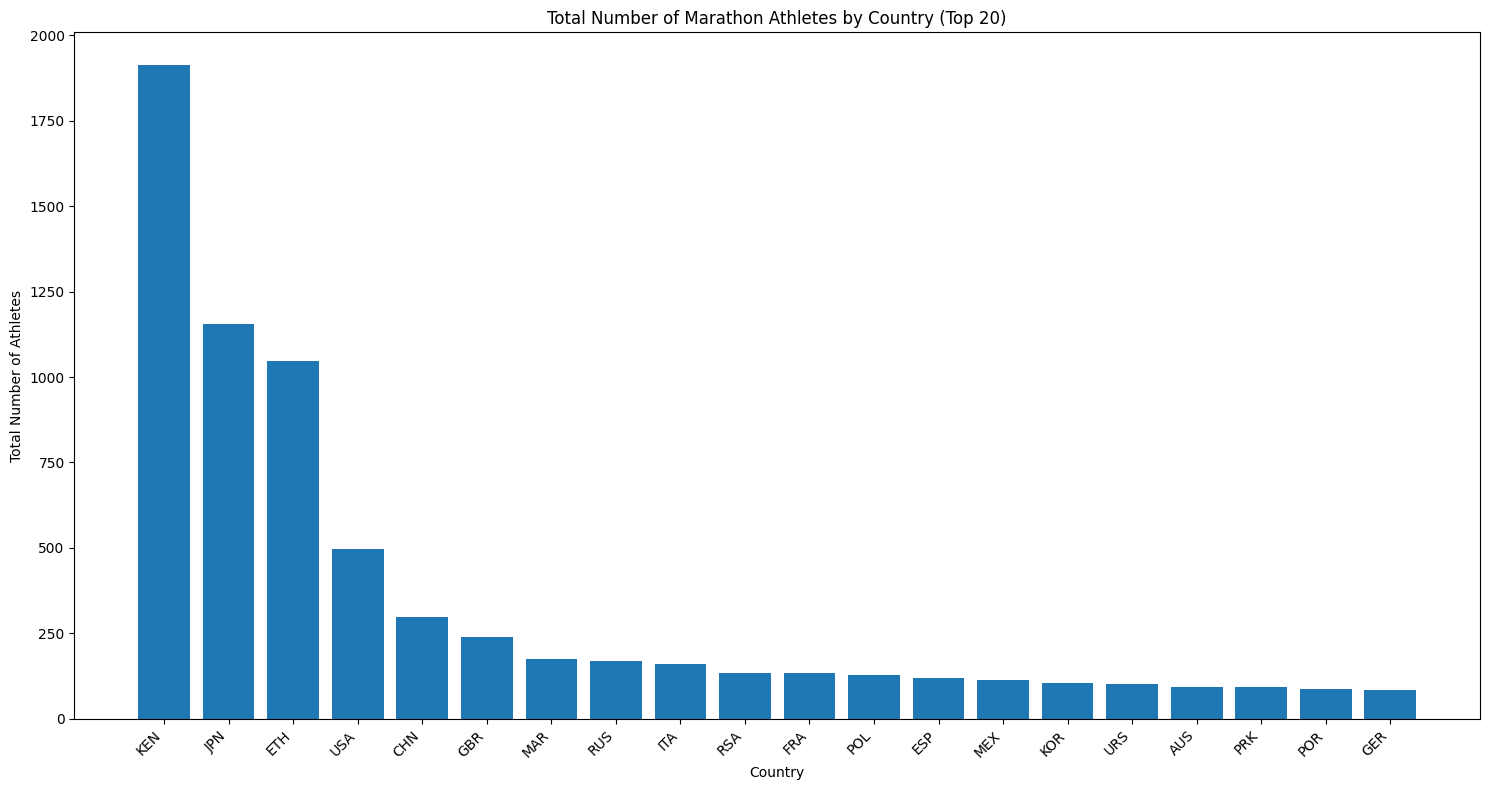

In [ ]:
# Select the top 20 countries by total athlete count for visualization
top_countries_total = total_athletes_by_country.head(20)

plt.figure(figsize=(15, 8))
plt.bar(top_countries_total['Country'], top_countries_total['total_athlete_count'])
plt.xlabel('Country')
plt.ylabel('Total Number of Athletes')
plt.title('Total Number of Marathon Athletes by Country (Top 20)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Task
Analyze and visualize the number of athletes participating in marathons over the years for each city using the data in "/content/marathon.csv".

## Count athletes by year and city

### Subtask:
Group the DataFrame by 'year' and 'City' and count the number of athletes for each combination.


**Reasoning**:
I will group the DataFrame by 'year' and 'City', count the number of athletes in each group, reset the index, and rename the count column to 'athlete_count'. This directly follows the instructions to count athletes per year and city.



In [30]:
athletes_by_year_city = df.groupby(['year', 'City']).size().reset_index(name='athlete_count')
display(athletes_by_year_city.head())

,year,City,athlete_count
0,1963,Chiswick,1
1,1963,Port Talbot,1
2,1964,Chiswick,1
3,1964,National Stadium,1
4,1965,Chiswick,1


## Analyze athlete count trends by city

### Subtask:
Explore ways to visualize or analyze the trends in athlete counts for different cities over the years. This might involve selecting the cities with the highest total participation or visualizing the counts for a subset of cities.


**Reasoning**:
Calculate the total number of athletes per city, identify the top cities, and filter the data to include only these cities.



In [31]:
total_athletes_by_city = athletes_by_year_city.groupby('City')['athlete_count'].sum().reset_index(name='total_athlete_count')
top_cities = total_athletes_by_city.sort_values(by='total_athlete_count', ascending=False).head(15)['City'].tolist()

filtered_city_df = athletes_by_year_city[athletes_by_year_city['City'].isin(top_cities)]

display(filtered_city_df.head())
display(top_cities)

,year,City,athlete_count
6,1966,Fukuoka,2
9,1967,Fukuoka,3
10,1968,Fukuoka,5
14,1969,Fukuoka,5
18,1970,Fukuoka,4


['Berlin',
 'Valencia',
 'London',
 'Tokyo',
 'Chicago',
 'Sevilla',
 'Osaka',
 'Rotterdam',
 'Paris',
 'Otsu',
 'Nagoya',
 'Frankfurt',
 'Fukuoka',
 'Amsterdam',
 'Seoul']

**Reasoning**:
Pivot the filtered data for plotting and create a stacked area plot to visualize the trend of athlete counts for the top cities over the years.



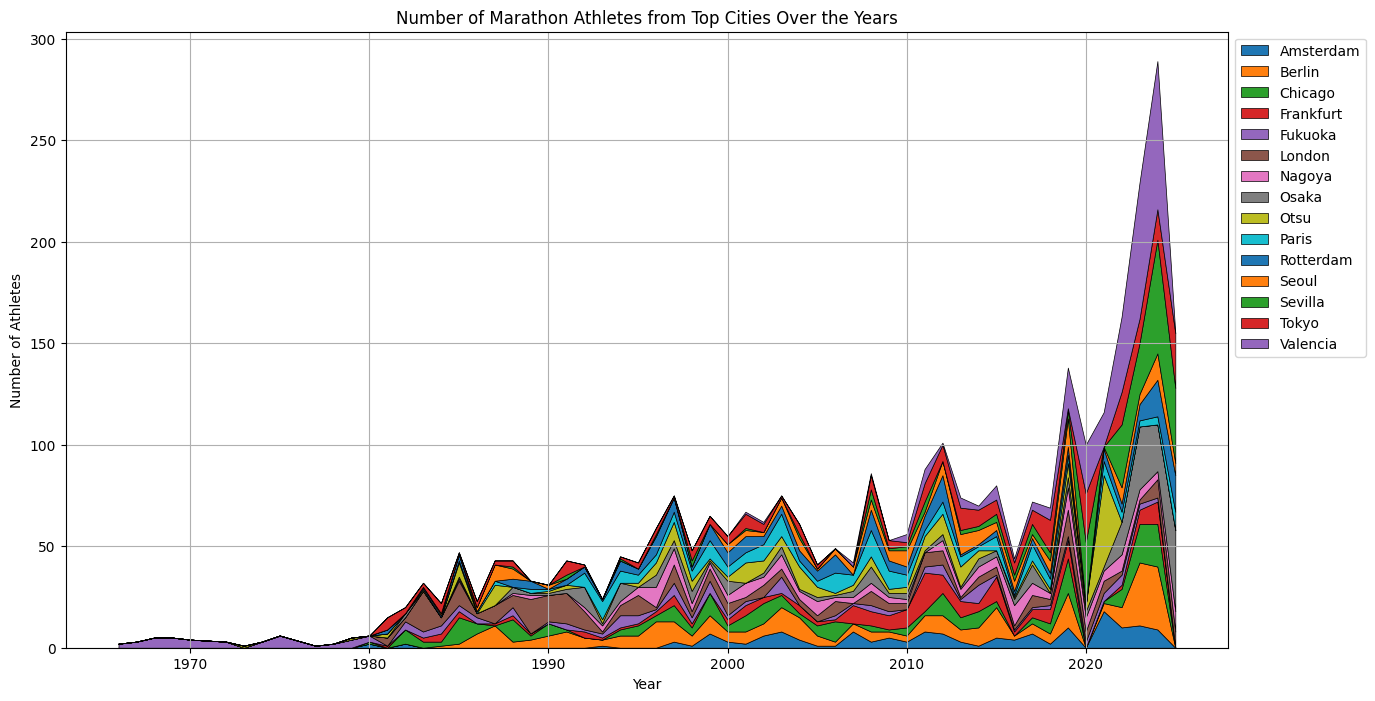

In [32]:
pivot_city_df = filtered_city_df.pivot(index='year', columns='City', values='athlete_count').fillna(0)

plt.figure(figsize=(15, 8))
plt.stackplot(pivot_city_df.index, pivot_city_df.values.T, labels=pivot_city_df.columns, edgecolor='black', linewidth=0.5)
plt.xlabel('Year')
plt.ylabel('Number of Athletes')
plt.title('Number of Marathon Athletes from Top Cities Over the Years')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

## Visualize athlete count trends by city

### Subtask:
Create a suitable plot (e.g., a line plot with different lines for each city) to visualize the number of athletes for each city over the years.


**Reasoning**:
Create a line plot to visualize the number of athletes for each city over the years, with a clear figure size, labels, title, legend outside the plot, and a grid.



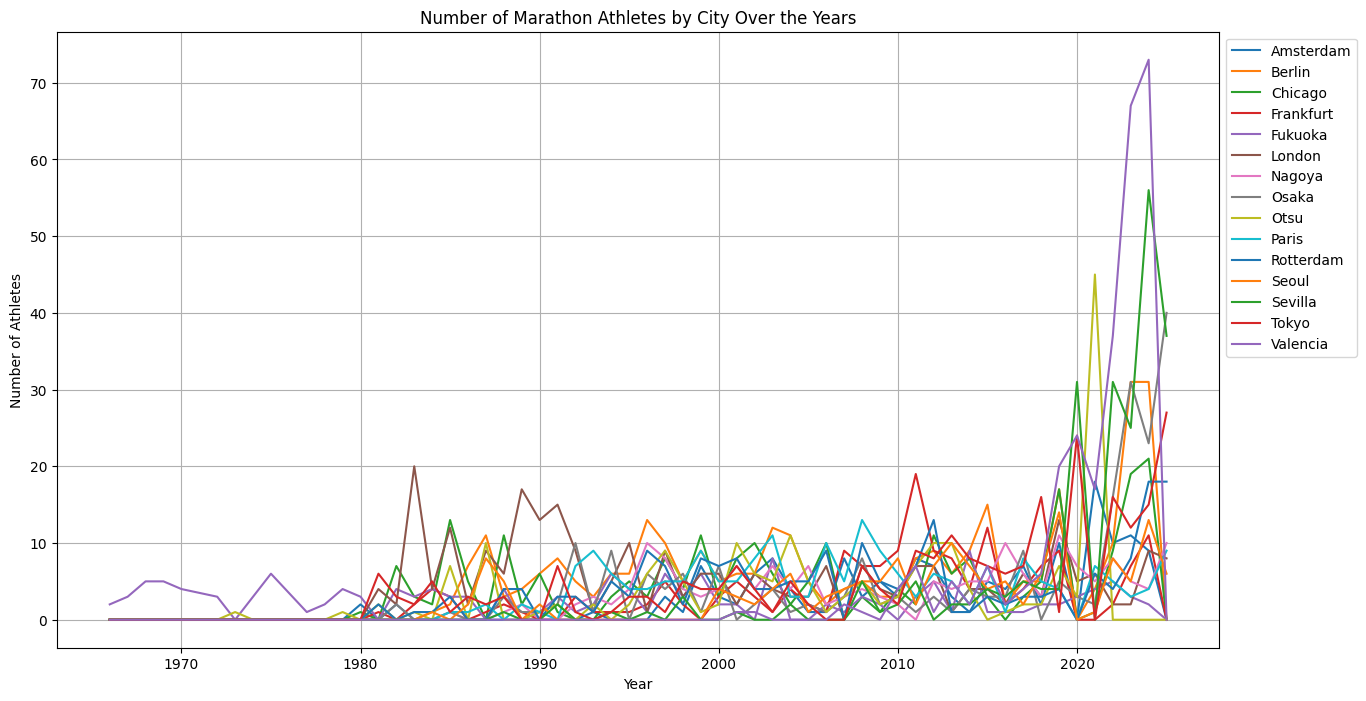

In [33]:
plt.figure(figsize=(15, 8))

for city in pivot_city_df.columns:
    plt.plot(pivot_city_df.index, pivot_city_df[city], label=city)

plt.xlabel('Year')
plt.ylabel('Number of Athletes')
plt.title('Number of Marathon Athletes by City Over the Years')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

## Summary:

### Data Analysis Key Findings

*   The top 15 cities with the highest total marathon athlete participation were identified as: 'Berlin', 'Valencia', 'London', 'Tokyo', 'Chicago', 'Sevilla', 'Osaka', 'Rotterdam', 'Paris', 'Otsu', 'Nagoya', 'Frankfurt', 'Fukuoka', 'Amsterdam', and 'Seoul'.
*   Both a stacked area plot and a line plot were used to visualize the number of athletes from the top cities over the years, showing the trends in participation for each city.

### Insights or Next Steps

*   Further analysis could focus on the growth rate of athlete participation in different cities to understand which locations are experiencing the most significant increases.
*   Investigating external factors that might influence athlete participation trends in specific cities (e.g., major events, economic conditions) could provide deeper insights.


# Task
Identify groups of athletes who likely trained together based on their country and date of birth.

## Group athletes by country and birth year

### Subtask:
Group the DataFrame by 'Country' and the year of 'Date of Birth' to identify potential training groups.

**Reasoning**:
Group the DataFrame by 'Country' and the year extracted from 'Date of Birth'. Then, count the number of athletes in each group and filter for groups with more than a certain number of athletes to identify potential training groups.

In [34]:
# Extract birth year
df['Birth_Year'] = df['Date of Birth'].dt.year

# Group by country and birth year and count athletes
potential_training_groups = df.groupby(['Country', 'Birth_Year']).size().reset_index(name='athlete_count')

# Filter for groups with more than a certain number of athletes (e.g., > 2)
likely_training_groups = potential_training_groups[potential_training_groups['athlete_count'] > 2].sort_values(by='athlete_count', ascending=False)

display(likely_training_groups)

,Country,Birth_Year,athlete_count
971,KEN,1984.0,104
973,KEN,1986.0,91
975,KEN,1988.0,85
965,KEN,1978.0,84
980,KEN,1993.0,81
...,...,...,...
120,BEL,1959.0,3
118,BEL,1957.0,3
117,BEL,1956.0,3
79,AUS,1995.0,3
